In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_excel(r"C:\Users\ABISA\Desktop\iris prediction\iris.xls")

In [5]:
df.head()

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,NaN,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


# Visualization of dataset

In [6]:
df.describe()

,SL,SW,PL,PW
count,143.000000,144.000000,144.000000,150.000000
mean,5.855944,3.049306,3.756250,1.198667
std,0.828168,0.430644,1.761306,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [7]:
df.shape

(150, 5)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SL              143 non-null    float64
 1   SW              144 non-null    float64
 2   PL              144 non-null    float64
 3   PW              150 non-null    float64
 4   Classification  150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [12]:
df.isna().sum()

SL                7
SW                6
PL                6
PW                0
Classification    0
dtype: int64

In [13]:
# Drop rows with missing values
df=df.dropna()

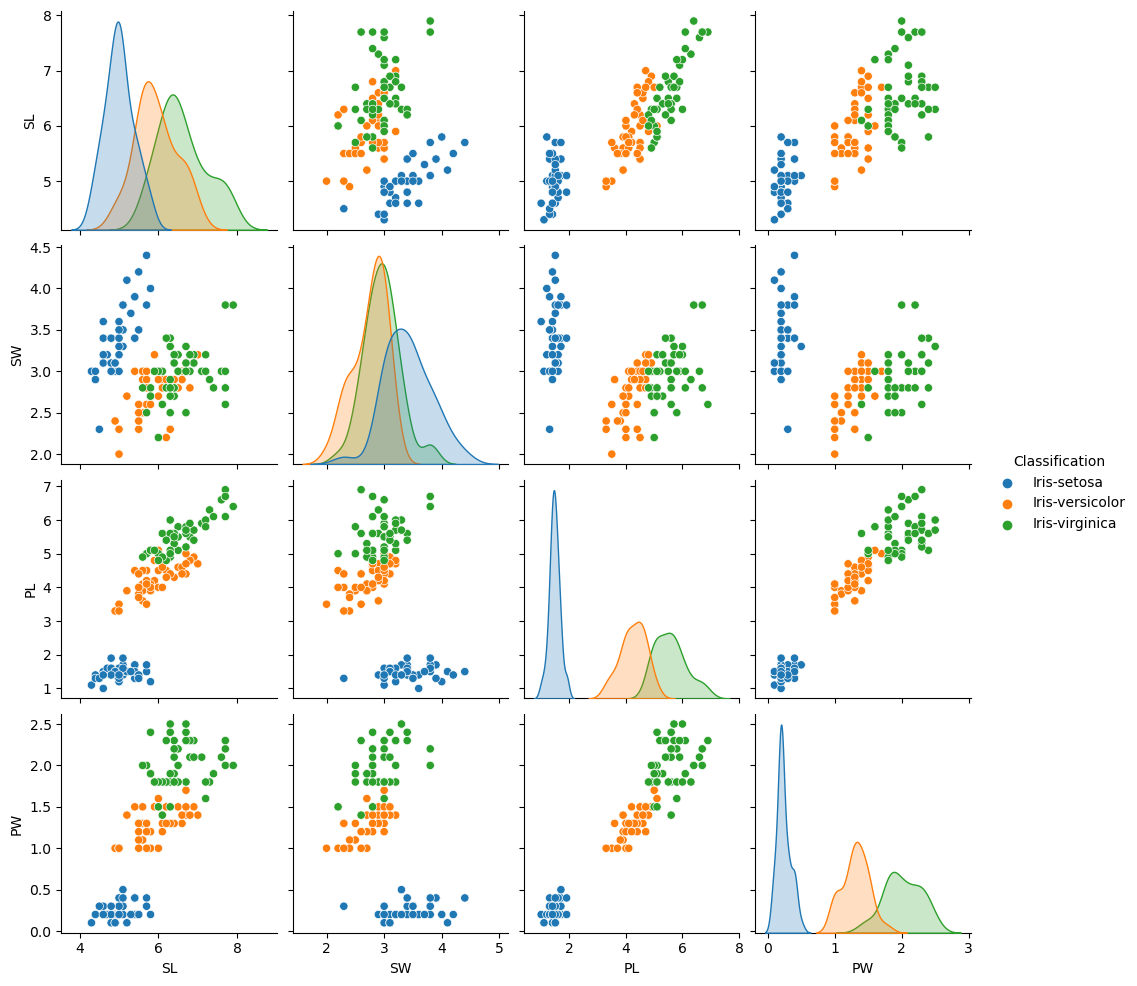

In [17]:
#visualize the whole dataset
sns.pairplot(df, hue='Classification')

# Seperating input columns and the output columns

In [18]:
data=df.values

In [19]:
X=data[:,0:4]
Y=data[:,4]

# Spitting the data into training and testing

In [20]:
#split the data to train and test dataset
from sklearn.model_selection import train_test_split
X_train, X_test,y_train,y_test =train_test_split(X,Y,test_size=0.2)

# Model 1:Support vector machine algorithm

In [22]:
from sklearn.svm import SVC

model_svc =SVC()
model_svc.fit(X_train,y_train)

SVC()

In [25]:
prediction1= model_svc.predict(X_test)
#Calculate the accuracy
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,prediction1)*100)

88.88888888888889


# module 2: Logistic Regression

In [26]:
from sklearn.linear_model import LogisticRegression
model_LR=LogisticRegression()
model_LR.fit(X_train,y_train)

C:\Users\ABISA\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [27]:
prediction2= model_LR.predict(X_test)
#Calculate the accuracy
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,prediction2)*100)

88.88888888888889


# Model3: Decision Tree Classifier

In [28]:
from sklearn.tree import DecisionTreeClassifier
model_DTC=DecisionTreeClassifier()
model_DTC.fit(X_train,y_train)

DecisionTreeClassifier()

In [29]:
prediction3= model_DTC.predict(X_test)
#Calculate the accuracy
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,prediction3)*100)

88.88888888888889


In [30]:
#A detailed classification report
from sklearn.metrics import classification_report
print(classification_report(y_test,prediction3))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         8
Iris-versicolor       0.70      1.00      0.82         7
 Iris-virginica       1.00      0.75      0.86        12

       accuracy                           0.89        27
      macro avg       0.90      0.92      0.89        27
   weighted avg       0.92      0.89      0.89        27



In [31]:
X_new =np.array([[3,2,1,0.2],[4.9,2.2,3.8,1.1],[5.3,2.5,4.6,1.9]])
#prediction of the species from the input vector
prediction=model_DTC.predict(X_new)
print("Prediction of species: {}".format(prediction))

Prediction of species: ['Iris-setosa' 'Iris-versicolor' 'Iris-versicolor']
